In [3]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd

In [4]:
def resonanceFreqResp(centerFreq, bandwidth, freqGrid):
    nFreqs = np.size(freqGrid)
    poleRadius = (2-bandwidth)/2
    poleAngle = np.arccos(2*poleRadius*np.cos(centerFreq)/(1+poleRadius**2))
    gain = (1-poleRadius**2)*np.sin(poleAngle)
    iirCoefficients = np.array([2*poleRadius*np.cos(poleAngle), -poleRadius**2])
    freqResp = gain/(1-2*poleRadius*np.cos(poleAngle)*np.exp(-1j*freqGrid)+poleRadius**2*np.exp(-1j*2*freqGrid))
    return freqResp

In [29]:
# compute the frequency response
nFreqs = 1000
samplingFreq = 1000;
digFreqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs
freqGrid = digFreqGrid*samplingFreq/(2*np.pi)
centerFreq = 2*np.pi*100/samplingFreq
bandwidth = 2*np.pi*50/samplingFreq
freqResp = resonanceFreqResp(centerFreq, bandwidth, digFreqGrid)
ampResp = np.abs(freqResp)
phaseResp = np.angle(freqResp)

ipd.Audio(freqResp,rate=samplingFreq)

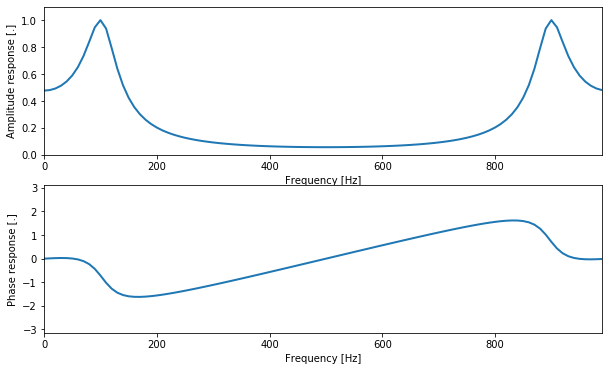

In [28]:
# plot the results
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(freqGrid, ampResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((0,1.1*np.max(ampResp)))
plt.xlabel('Frequency [Hz]'), plt.ylabel('Amplitude response [.]');
plt.subplot(2,1,2)
plt.plot(freqGrid, phaseResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((-np.pi,np.pi))
plt.xlabel('Frequency [Hz]'), plt.ylabel('Phase response [.]');
    

In [32]:
'''
def ResonatorFilter(centerFreq, bandwidth):
    poleRadius = (2-bandwidth)/2
    poleAngle = np.arccos(2*poleRadius*np.cos(centerFreq)/(1+poleRadius**2))
    gain = (1-poleRadius**2)*np.sin(poleAngle)
    iirCoefficients = np.array([2*poleRadius*np.cos(poleAngle), -poleRadius**2])
    
    return iirCoefficients
    
samplingFreq = 
centerFreq = 2*np.pi*100/samplingFreq
bandwidth = 2*np.pi*50/samplingFreq
    
ipd.Audio(ResonatorFilter(centerFreq,bandwidth),rate=samplingFreq)
'''

'\ndef ResonatorFilter(centerFreq, bandwidth):\n    poleRadius = (2-bandwidth)/2\n    poleAngle = np.arccos(2*poleRadius*np.cos(centerFreq)/(1+poleRadius**2))\n    gain = (1-poleRadius**2)*np.sin(poleAngle)\n    iirCoefficients = np.array([2*poleRadius*np.cos(poleAngle), -poleRadius**2])\n    \n    return iirCoefficients\n    \nsamplingFreq = \ncenterFreq = 2*np.pi*100/samplingFreq\nbandwidth = 2*np.pi*50/samplingFreq\n    \nipd.Audio(ResonatorFilter(centerFreq,bandwidth),rate=samplingFreq)\n'

In [41]:
def ResonatorFilter(inputSignal, nData, centerFreq, bandwidth, freqGrid):
    samplingIndices = np.arange(nData)
    outputSignal = np.zeros(nData)
    
    nFreqs = np.size(freqGrid)
    poleRadius = (2-bandwidth)/2
    poleAngle = np.arccos(2*poleRadius*np.cos(centerFreq)/(1+poleRadius**2))
    gain = (1-poleRadius**2)*np.sin(poleAngle)
    outputSignal = np.array([inputSignal+2*poleRadius*np.cos(poleAngle), -poleRadius**2])
    return outputSignal
    
    

In [57]:
nFreqs = 1000
samplingFreq = 44100 # Hz
digFreqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs
freqGrid = digFreqGrid*samplingFreq/(2*np.pi)
centerFreq = 2*np.pi*100/samplingFreq
bandwidth = 2*np.pi*50/samplingFreq
freqResp = resonanceFreqResp(centerFreq, bandwidth, digFreqGrid)
ampResp = np.abs(freqResp)
phaseResp = np.angle(freqResp)

simulationTime = 3 #s
nData = np.int(simulationTime*samplingFreq)
nNoiseSamples = 200
inputSignal = np.r_[np.random.randn(nNoiseSamples),np.zeros(nData-nNoiseSamples)] # a short noise burst

# run the algorithm
outputSignal, samplingIndices = \
    ResonatorFilter(inputSignal, nData, centerFreq, bandwidth, freqGrid)

# play back the signal
ipd.Audio(outputSignal, rate=samplingFreq) 